## EXERCISES
- elpais 기사로 텍스트 분석한다면...

In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [2]:
html = urlopen('https://elpais.com/babelia/2021-10-25/metidos-hasta-el-cuello-en-la-distopia.html')
bs = BeautifulSoup(html.read(), 'html.parser')
print(bs.h1) # headline

<h1 class="a_t">Bienvenidos a la era de la distopía</h1>


In [3]:
content = bs.findAll('p', {'class':''})

In [4]:
data = []
for line in content:
    data.append(line.get_text())
    
data

['Arranquemos con cifras. The Guardian informó el 17 de septiembre de 2019 de que Los testamentos (Atwood, 2019) había vendido en cinco días más de cien mil copias en Estados Unidos. Traducida a cincuenta y cuatro idiomas, la trilogía Los juegos del hambre (Collins, 2008) lleva vendidos más de cien millones de ejemplares, sin contar los de la precuela, Balada de pájaros cantores y serpientes (Collins, 2020). La versión cinematográfica del primer volumen de la saga recaudó la nada despreciable cantidad de setecientos millones de dólares. Cuantías similares engalanan las novelas Divergente (Roth, 2011) y, algo por debajo, El corredor del laberinto (Dashner, 2009). Tras la llegada a la presidencia de Donald Trump, 1984 (Orwell, 1949) batió récord de ventas. La tónica se reproduce dentro del ámbito televisivo. La serie El cuento de la criada ganó ocho galardones de los premios Emmy en 2017, edición en la que Westworld contaba con hasta veintidós nominaciones, mientras que Black Mirror lide

In [27]:
len(data)  # segment

14

#### tokenize

In [6]:
# sentence split
import nltk
sent_tokenizer = nltk.data.load('tokenizers/punkt/spanish.pickle')

In [7]:
result = sent_tokenizer.tokenize(' '.join(data)) # segment 경계 없앰
result

['Arranquemos con cifras.',
 'The Guardian informó el 17 de septiembre de 2019 de que Los testamentos (Atwood, 2019) había vendido en cinco días más de cien mil copias en Estados Unidos.',
 'Traducida a cincuenta y cuatro idiomas, la trilogía Los juegos del hambre (Collins, 2008) lleva vendidos más de cien millones de ejemplares, sin contar los de la precuela, Balada de pájaros cantores y serpientes (Collins, 2020).',
 'La versión cinematográfica del primer volumen de la saga recaudó la nada despreciable cantidad de setecientos millones de dólares.',
 'Cuantías similares engalanan las novelas Divergente (Roth, 2011) y, algo por debajo, El corredor del laberinto (Dashner, 2009).',
 'Tras la llegada a la presidencia de Donald Trump, 1984 (Orwell, 1949) batió récord de ventas.',
 'La tónica se reproduce dentro del ámbito televisivo.',
 'La serie El cuento de la criada ganó ocho galardones de los premios Emmy en 2017, edición en la que Westworld contaba con hasta veintidós nominaciones, mi

In [8]:
result[:5]

['Arranquemos con cifras.',
 'The Guardian informó el 17 de septiembre de 2019 de que Los testamentos (Atwood, 2019) había vendido en cinco días más de cien mil copias en Estados Unidos.',
 'Traducida a cincuenta y cuatro idiomas, la trilogía Los juegos del hambre (Collins, 2008) lleva vendidos más de cien millones de ejemplares, sin contar los de la precuela, Balada de pájaros cantores y serpientes (Collins, 2020).',
 'La versión cinematográfica del primer volumen de la saga recaudó la nada despreciable cantidad de setecientos millones de dólares.',
 'Cuantías similares engalanan las novelas Divergente (Roth, 2011) y, algo por debajo, El corredor del laberinto (Dashner, 2009).']

#### word_tokenize + stopwords 

In [9]:
from nltk.corpus import stopwords
stop_words = stopwords.words('spanish')

In [10]:
import spacy
nlp = spacy.load('es_core_news_sm')

In [11]:
sample = [nlp(sentence) for sentence in result]

token_list = []
token_list_all = []

for sentence in sample:
    tokens = [str(token).lower() for token in sentence] # type 바꿔주어야 함.
    eliminated_tokens = [word for word in tokens  if word not in stop_words] 
    #print(eliminated_tokens)
    #print('토큰 길이= ', len(tokens), len(eliminated_tokens), '\n')
    
    token_list.append(eliminated_tokens) # 문장 경계 있는
    token_list_all.extend(eliminated_tokens) # 문장 경계 없는 

In [12]:
len(token_list)

81

In [28]:
token_list[:3]

[['arranquemos', 'cifras', '.'],
 ['the',
  'guardian',
  'informó',
  '17',
  'septiembre',
  '2019',
  'testamentos',
  '(',
  'atwood',
  ',',
  '2019',
  ')',
  'vendido',
  'cinco',
  'días',
  'cien',
  'mil',
  'copias',
  'unidos',
  '.'],
 ['traducida',
  'cincuenta',
  'cuatro',
  'idiomas',
  ',',
  'trilogía',
  'juegos',
  'hambre',
  '(',
  'collins',
  ',',
  '2008',
  ')',
  'lleva',
  'vendidos',
  'cien',
  'millones',
  'ejemplares',
  ',',
  'contar',
  'precuela',
  ',',
  'balada',
  'pájaros',
  'cantores',
  'serpientes',
  '(',
  'collins',
  ',',
  '2020',
  ')',
  '.']]

### visualization

In [22]:
token_length = [len(x) for x in token_list]
token_length[:10]

[3, 20, 32, 12, 21, 16, 6, 28, 9, 18]

In [15]:
import numpy as np

In [16]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

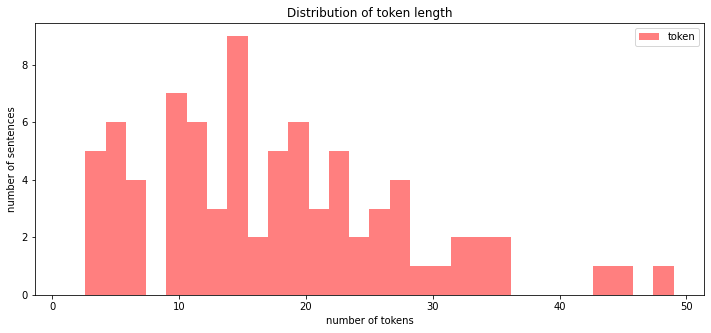

In [17]:
plt.figure(figsize=(12, 5))
plt.hist(token_length, bins=30, alpha=0.5, color='r', label='token', range=[1, np.max(token_length)])
# bins: 히스토그램 값들에 대한 버켓 범위
# range: x축 값의 범위
# alpha: 그래프 색상 투명도
# color: 그래프 색상
# label: 그래프에 대한 라벨
plt.title('Distribution of token length')
plt.legend()
plt.xlabel('number of tokens')
plt.ylabel('number of sentences')
plt.show()

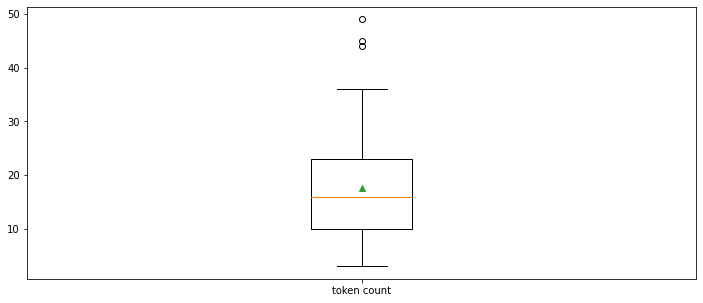

In [18]:
plt.figure(figsize=(12, 5))
plt.boxplot(token_length,
           labels=['token count'], # 입력한 데이터에 대한 라벨
           showmeans=True) # 평균값을 마크함
plt.show()

In [29]:
token_list_all[:10] # 문장 경계 없는 리스트

['arranquemos',
 'cifras',
 '.',
 'the',
 'guardian',
 'informó',
 '17',
 'septiembre',
 '2019',
 'testamentos']

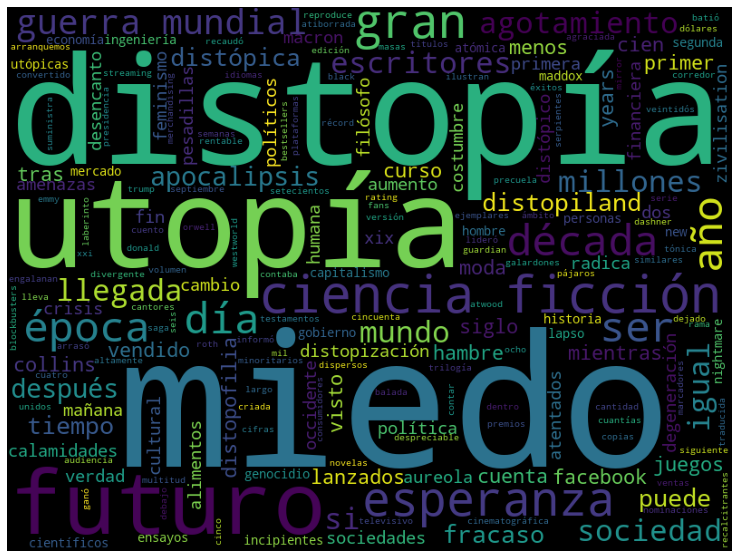

In [33]:
cloud = WordCloud(width=800, height=600).generate(' '.join(token_list_all))
plt.figure(figsize=(15, 10))
plt.imshow(cloud)
plt.axis('off')
plt.show()